In [1]:
from citipy import citipy as citi
import requests as req
import matplotlib.pyplot as plt
import os 
import csv
import pandas as pd
import numpy as np
import json

In [2]:
citi_geocode = []

In [3]:
file_path = os.path.join('../WeatherPy/data/worldcities.csv')

In [4]:
with open(file_path, newline='') as city_file:
    cities=csv.reader(city_file, delimiter=',')
    #next(cities)
    
    for city in cities:
        geocode = (city[2], city[3])
        citi_geocode.append(geocode)

In [5]:
geocode_df = pd.DataFrame(citi_geocode[1:],columns=citi_geocode[0])

In [6]:
geocode_sample = geocode_df.sample(500)

In [7]:
geocode_sample.head()

,Latitude,Longitude
32831,46.4,24.266667
42969,26.2825000,-80.1072222
8713,50.733333,8.283333
8645,49.397222,8.533611
18080,25.633333,88.316667


In [8]:
city_df = pd.DataFrame()
city_df ['City Name'] = ""
city_df['Latitude'] = ""

In [9]:
for index, row in geocode_sample.iterrows():
    #print(row['Latitude'], row['Longitude'])
    city =  citi.nearest_city(float(row['Latitude']), float(row['Longitude']))
    city_name = city.city_name
    city_df.set_value(index, 'City Name', city_name)
    city_df.set_value(index, 'Latitude', row['Latitude'])

In [10]:
city_df.shape

(500, 2)

In [11]:
weather = pd.DataFrame()
weather['City Name'] = ""
weather['Latitude'] =""
weather['Temperature'] =""
weather['Humidity'] =""
weather['Cloudiness'] =""
weather['Wind Speed'] =""

In [12]:
api_key = "7be7dfb02672af49d73e9ca689405225"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [13]:
for index, row in city_df.iterrows():
    # print(row['City Name'])
    try:
        query_url = url + "appid="+api_key + "&units=" + units + "&q="+ row['City Name'] + "&units=" + units
        print(query_url)
        response = req.get(query_url)
        data = response.json()
        temperature = data["main"]["temp"]
        humidity = data["main"]["humidity"]
        cloudiness = data["clouds"]["all"]
        wind_speed = data["wind"]["speed"]
        weather.set_value(index, 'City Name', row['City Name'])
        weather.set_value(index, 'Latitude', row['Latitude'])
        weather.set_value(index, 'Temperature', temperature)
        weather.set_value(index, 'Humidity', humidity)
        weather.set_value(index, 'Cloudiness', cloudiness)
        weather.set_value(index, 'Wind Speed', wind_speed)
    except:
        continue

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=cucerdea&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=pompano beach highlands&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=dillenburg&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=bruhl&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=kaliyaganj&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=njinikom&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=chirkey&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=impe

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=kipalbig&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=bytkiv&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=ancud&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=ouidah&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=borsodnadasd&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=namyslow&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=lukovskaya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=dapdap&un

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=shanting&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=san juancito&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=mons&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=estancia velha&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=la rinconada&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=jizan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=the village&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=lohmar&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=yuzhnyy-kospashskiy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=helsingborg&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=pakxe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=puyallup&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=cristesti&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=las margaritas&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=pec&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=skali&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=odiongan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=talitsy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=biri&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=schalksmuhle&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=solin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=atotonilco el alto&u

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=goderich&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=college&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=protivin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=policka&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=oildale&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=rongu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=hatsukaichi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=chelyabinsk

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=laguilayan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=rudnik&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=graaff-reinet&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=bridgeton&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=ardassa&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=duderstadt&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=valencia&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=s

http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=papagaios&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=lufkin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=san cristobal&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=san rafael&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=mamaku&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=ararat&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&q=vigia del fuerte&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=7be7dfb02672af49d73e9ca689405225&units=imperial&

In [14]:
weather.reset_index(inplace=True)
weather.shape

(500, 7)

In [15]:
weather_df = weather.iloc[:, 1:7]
weather_df.to_csv('output/city_weather.csv')
weather_df.head()

,City Name,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,cucerdea,46.4,60.85,67,40,3.36
1,pompano beach highlands,26.2825000,71.37,60,1,9.17
2,dillenburg,50.733333,48.2,81,75,13.87
3,bruhl,49.397222,56.17,66,40,11.41
4,kaliyaganj,25.633333,72.1,79,0,2.82


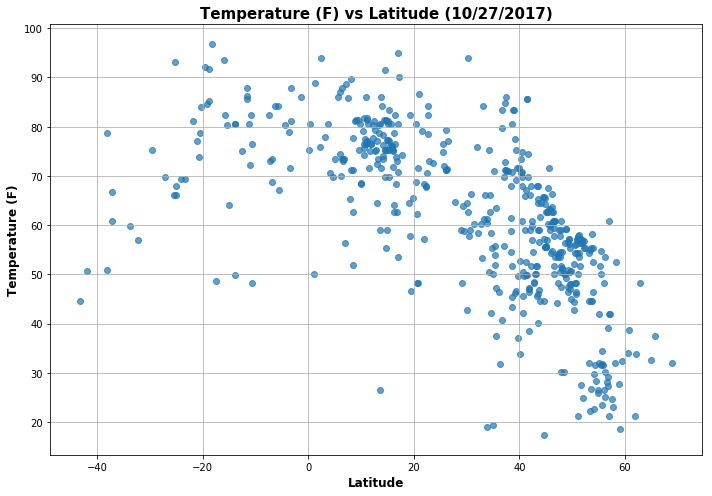

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.scatter('Latitude', 'Temperature', data = weather_df, alpha = 0.7)
ax.set_title("Temperature (F) vs Latitude (10/27/2017)", weight='bold', fontsize=15)
ax.set_xlabel("Latitude", weight='bold', fontsize = 12)
ax.set_ylabel('Temperature (F)', weight ='bold', fontsize=12)
#ax.set_aspect('auto')
fig.tight_layout()
fig.savefig('output/temperatureVsLat.png')
plt.grid()
plt.show()

In [17]:
""" The figure above plots temperature measured in fahrenheit against latitude for five hundred cities selected randomly
around the world. From the graph above we find that there is an inverse relationship between latitude and temperature 
where regions at lower latitudes have higher temperatures compared to areas at higher latitudes. For example, city with 
latitude around -20 have the highest temperature of 97 degree fahrenheit whereas city with latitude 60 are having temperature 
of 19 degree fahrenheit. 
"""

' The figure above plots temperature measured in farenheit against latitude \n\n'

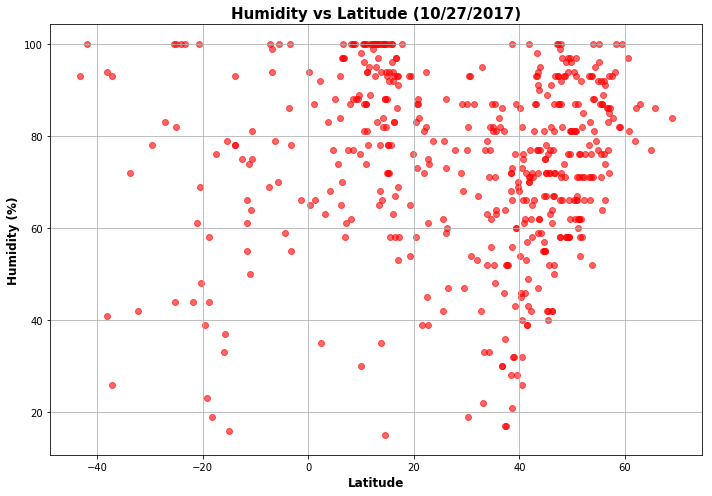

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.scatter('Latitude', 'Humidity', data = weather_df, alpha = 0.6, color='r')
ax.set_title("Humidity vs Latitude (10/27/2017)", weight='bold', fontsize=15)
ax.set_xlabel("Latitude", weight='bold', fontsize = 12)
ax.set_ylabel('Humidity (%)', weight ='bold', fontsize=12)
fig.tight_layout()
fig.savefig('output/humidityVsLat.png')
plt.grid()
plt.show()

In [ ]:
"""The figure above plots humidity (%), the amount of water vapor in the air, against latitude for the same set of cities. 
The graph above displays mixed pattern as the city with both higher and lower latitude are having humidity of low and high. 
The cities with latitude 40 have humidity ranging from 25 to 85 percent. With higher latitude the range in humidity is 
40 to 100 percent. Googling about the relationship between humidity and latitude suggests that humidity also depends on the 
regions where the cities are located. """

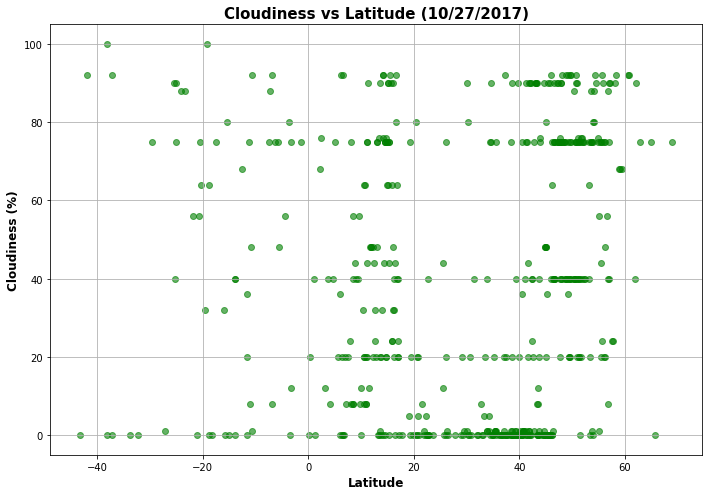

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.scatter('Latitude', 'Cloudiness', data = weather_df, alpha = 0.6, color='g')
ax.set_title("Cloudiness vs Latitude (10/27/2017)", weight='bold', fontsize=15)
ax.set_xlabel("Latitude", weight='bold', fontsize = 12)
ax.set_ylabel('Cloudiness (%)', weight ='bold', fontsize=12)
fig.tight_layout()
fig.savefig('output/cloudinessVsLat.png')
plt.grid()
plt.show()

In [ ]:
""" The plot of cloudiness vs latitude for the cities also doesn't reveal any trend. Percent of cloudiness have both high and low 
across latitude for the cities. """

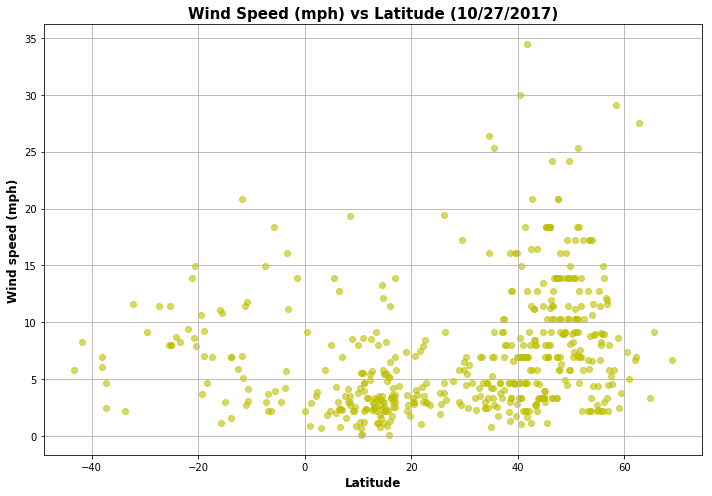

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.scatter('Latitude', 'Wind Speed', data = weather_df, alpha = 0.6, color='y')
ax.set_title("Wind Speed (mph) vs Latitude (10/27/2017)", weight='bold', fontsize=15)
ax.set_xlabel("Latitude", weight='bold', fontsize = 12)
ax.set_ylabel('Wind speed (mph)', weight ='bold', fontsize=12)
fig.tight_layout()
fig.savefig('output/windSpeedVsLat.png')
plt.grid()
plt.show()

In [ ]:
""" The plot of wind speed measured by miles per hour vs latitude reveal that in most cities selected randomly in this analysis
have low wind speed. However we can't draw any definitive conclusion about relatshiop between winde speed and latitude. 
"""